'정규방정식'(수학식)에 넣어서 세타값 최소화 하는 방식 -> '해석적 방법'.

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)

y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + 노이즈.

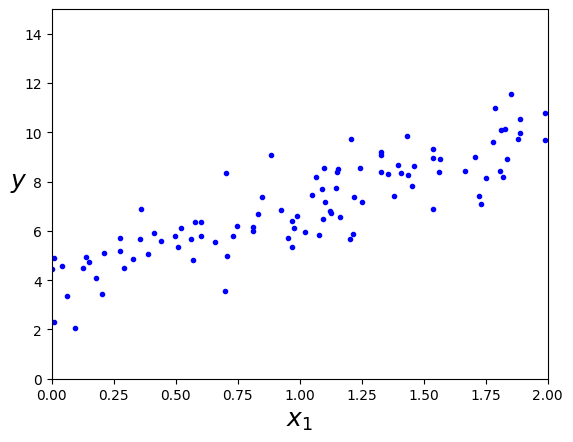

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")                          # 파랑 점: 훈련 세트 산점도
plt.xlabel("$x_1$", fontsize=18)              # x축 표시
plt.ylabel("$y$", rotation=0, fontsize=18)    # y축 표시
plt.axis([0, 2, 0, 15])                       # x축, y축 구간 지정

plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # T가 배열 전치(transpose)

inv() 함수로 역행렬 계산하고, dot()써서 행렬곱셈.

In [4]:
theta_best

array([[3.9611544 ],
       [3.01773241]])

θ_0값이 3.78  θ_1값이 3.109
<br>
원래 y = 4 + 3x + 잡음 이어서 4, 3값이 나와야 하는데, 이상함.

In [5]:
X_new = np.array([[0], 
                  [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.9611544 ],
       [9.99661921]])

전체 θ값 계산.

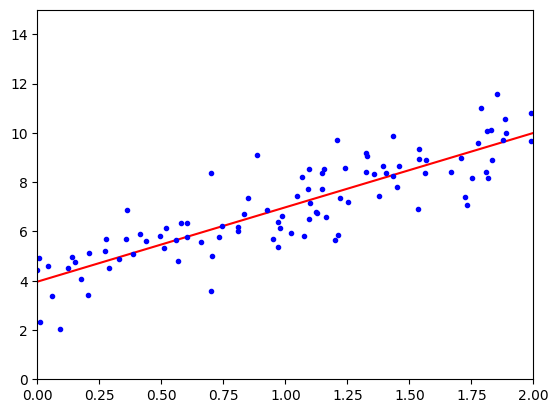

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
lin_reg.intercept_, lin_reg.coef_ #intercept_는 편향값. coef_는 가중치 값.

(array([3.9611544]), array([[3.01773241]]))

In [9]:
lin_reg.predict(X_new)

array([[3.9611544 ],
       [9.99661921]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[3.9611544 ],
       [3.01773241]])

np.linalg.lstsq() == scipy.linalg.lstsq()

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.9611544 ],
       [3.01773241]])

np.linalg.pinv()가 유사역행렬값 계산. -> X+가 X의 유사역행렬.

유사역행렬이 '특잇값 분해(SVD)'로 계산.
<br>
유사역행렬 구하려면:
1. Σ구하기
2. 임계값 보다 낮은 것 0으로
3. 0 아닌 값 전부 역수
4. 행렬 전치.
<br>
<br>
유사역행렬이 참 좋은게 XtX의 역행렬이 없으면, 정규방정식이 작동 안하는데, 유사역행렬은 항상 가능.


정규방정식 계산 복잡도 -> O(n^2.4) ~ O(n^3)
<br>
SVD방식 -> O(n^2)

경사 하강법(GD) ->비용함수 최소화 위하여, 반복해서 파라미터값 조정해 나가는 것.
<br>
기울기 값 계산하는데, 0이 되면 최솟값에 도달한 것.
<br>
무작위 초기화: 세타값을 임의의 값으로 시작하는 것.
<br>
학습 스텝크기(학습률로 결정)는 비용함수 기울기에 비례. 그래서 최솟값에 가까워 질 수록, 스텝 크기 점진적 줄어듦.

이 학습률이 너무 크면, 발산하게 됨. 그래서 참 어려움.
<br>
또 '무작위 초기화'때문에, '전역최솟값(global minimum)'말고 '지역 최솟값(local minimum)'에 수렴하는 경우 있음.

임의의 곡선에서 점 두개 선택해서 선 그엇을 때, 선이 곡선 위에 있음 '볼록함수' 반대면 '오목함수'
<br>
이는 지역 최솟값은 없고, 전역 최솟값만 있다는 말. -> 연속함수 & 기울기 급격한 변화 없음.

'세타값'이 변경될 때, '비용함수' 얼마나 바뀌는지 계산하는 걸 '편도함수'.
<br>
비용함수 미분해서 기울기 변화 관찰하는 것.
<br>
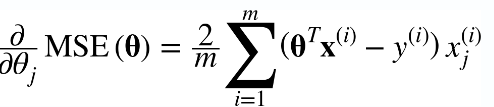  MSE 편미분

위 함수가 편도 함수 각각 계산하는 거라면,
<br>
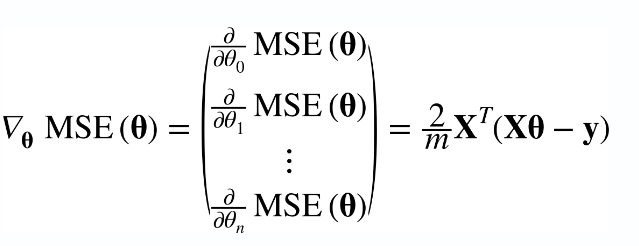  이게 한꺼번에 계산하는 식.

공식을 보면, 전체 훈련세트에 대해서 계산을 하는데, 스텝마다의 계산이므로, '배치 경사 하강법'.

gradient vector가 구해지면, 다음 step으로 가기 위한 세타값 구해야 하는데, 그 식이
<br>
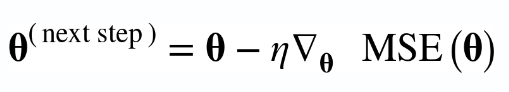 

In [12]:
eta = 0.1 # 학습률
n_iterations = 1000 # 반복횟수
m = 100 # 샘플 갯수

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y) #이게 배치 경사하강법.
    theta = theta - eta * gradients # 다음 스텝. 위 식.

In [13]:
theta

array([[3.9611544 ],
       [3.01773241]])

확인결과. 정규방정식으로 나온 값이랑 같음.

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

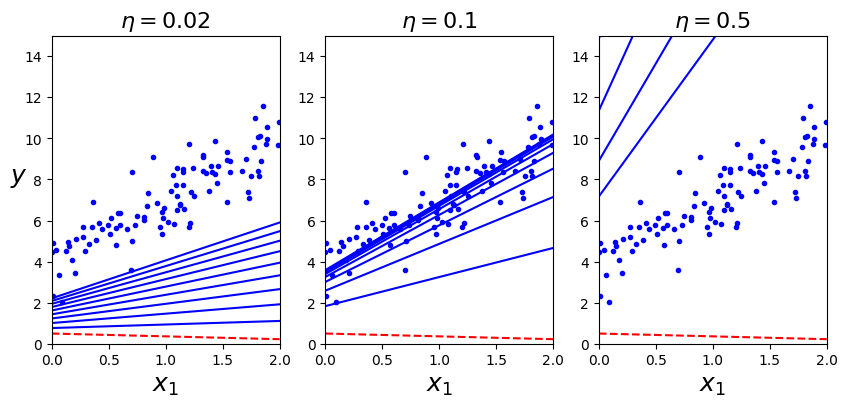

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기값 설정

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

왼쪽: 학습률이 너무 낮음.
<br>
가운데:학습률 딱 적당
<br>
오른쪽: 발산.

적절 학습률 찾으려면, '그리드 탐색' 사용.
<br>
수렴하는데 오래 걸리는걸 막기 위해 '반복횟수 제한'
<br>
이를 위해서는 반복횟수 크게 지정, gradient vector가 작아지면, 중지.(허용오차 보다 작아지면 중지.)

확률적 경사 하강법: 매 스탭에서 한개의 샘플 무작위 선택. 그 샘플 기울기값 계산.
<br>
경사하강법 보다 빠름. 하지만 불안정.(최솟값에 도달 못 할수도)
<br>
지역최솟값은 벗어날 수 있고, 전역 최솟값 찾을 가능성 높음.
<br>
이 단점 해결하기 위해, 학습률 점진적 감소(담금질 기법)
<br>
학습률 결정하는 함수를 '학습 스케줄'

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

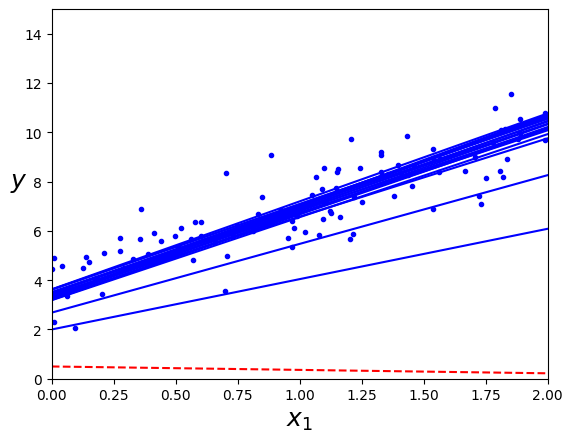

In [17]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터.

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기값

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                   
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"      
            plt.plot(X_new, y_predict, style)    
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients
        theta_path_sgd.append(theta)             

        
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)          
plt.ylabel("$y$", rotation=0, fontsize=18)    
plt.axis([0, 2, 0, 15])                        
plt.show()                                 

In [18]:
theta

array([[3.96276701],
       [3.02759577]])

In [19]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1) #max_iter = 1000은 최대 에포크 크기, penalty = None은 규제 안한다는 것.
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

tol = 1e-3은 허용오차(0.001 보다 loss 줄어들면 중지)한다는 뜻.
<br>
eta는 학습률. 0.1로 설정

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91763126]), array([3.04701417]))

정규방정식(위 방식대로 구한 것)과 비슷한 결과.

미니배치 경사 하강법(mini-batch gradient descent): 미니배치(임의로 작은 샘플로 나눈 것)에 대한 기울기 계산하는 것.
<br>
-----> GPU쓰는 방식.

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

In [22]:
t = 0

for epoch in range(n_iterations):
    
    # 에포크가 바뀔 때마다 훈련 데이터 섞기
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # 20개 데이터 샘플을 훈련할 때마다 파라미터 업데이트
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)        # 학습 스케줄 활용
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[3.96785004],
       [3.04382269]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

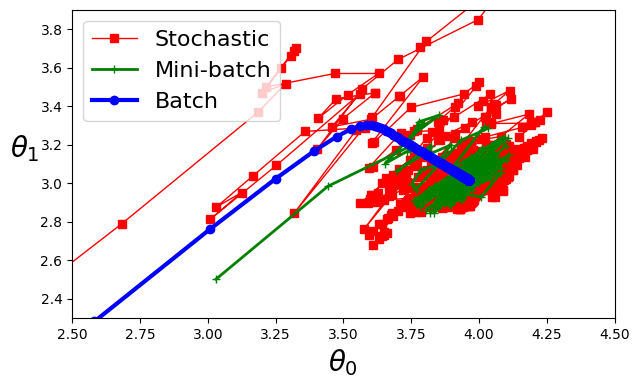

In [25]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

위 그림은 각각의 경사 하강법의 학습과정 비교.
<br>
확률적 경사하강법은 최적 파라미터 값에서 심하게 튀는 것 확인.
<br> 미니 배치 경사하강법은 최적 파라미터 값에서 동일하게 튀는 것 확인.
<br> 배치 경사 하강법은 속도는 느리지만, 최적값에 서서히 수렴(튀는 것 거의 없이).